In [1]:
# импрорт необходимых библиотек
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgb

# метрики качества
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

# для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

# настройки консольного вывода
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# путь к данным -- поменять на свой !!!
path = '../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv'
# создание датафрейма
df_CC = pd.read_csv(path)

# Разведка данных


In [3]:
# Базовое описание данных
df_CC.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Как можно видеть средний возраст клиента 35 лет со стандратным отклонением в районе 9 лет\
Дефолт произошел примерно в 22 процентах случаев выдач займов по кредитным картам

In [4]:
# Все клиенты уникальны, повторения в данных отсутсвуют, что важно для подтверждения предположения о независимости всех наблюдений
print(sum(df_CC['ID'].duplicated()))
print(sum(df_CC.duplicated()))

0
0


In [5]:
# важно посмотреть на типы данных, в случае ошибок и неопределенности исправить это
df_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
# также важно отследить наличие пустых значений и выбрать стратегию их заполнения
df_CC.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
# вывожу дефолтную переменную в y для дальнейшего сплита и создаю колонку def30 для удобства
y = df_CC['default.payment.next.month']
df_CC ['def30'] = y
df_CC.drop('default.payment.next.month', axis=1, inplace=True)

In [8]:
for num, col in enumerate(df_CC.columns):
    print(num, col)

0 ID
1 LIMIT_BAL
2 SEX
3 EDUCATION
4 MARRIAGE
5 AGE
6 PAY_0
7 PAY_2
8 PAY_3
9 PAY_4
10 PAY_5
11 PAY_6
12 BILL_AMT1
13 BILL_AMT2
14 BILL_AMT3
15 BILL_AMT4
16 BILL_AMT5
17 BILL_AMT6
18 PAY_AMT1
19 PAY_AMT2
20 PAY_AMT3
21 PAY_AMT4
22 PAY_AMT5
23 PAY_AMT6
24 def30


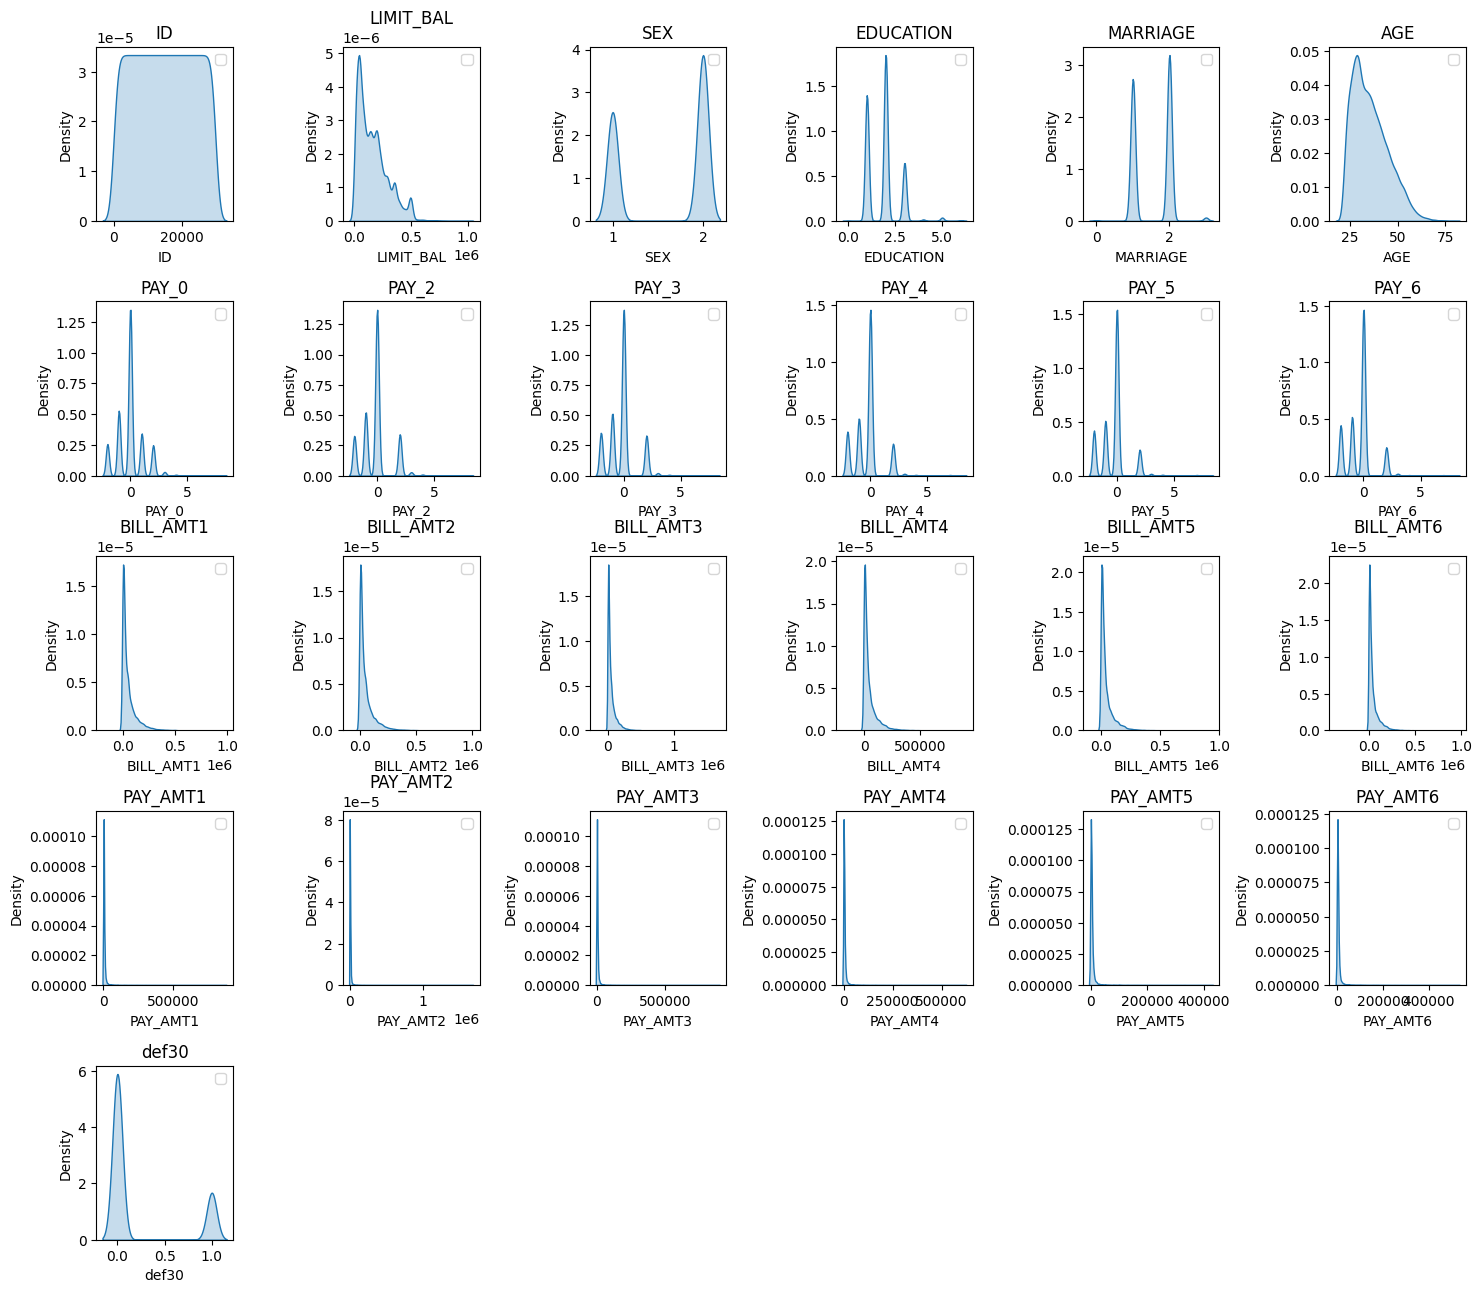

In [9]:
# Давайте посмотрим распределения графиков по переменным в разрезе их плотности
plt.figure(figsize=(15,15))
for num, col in enumerate(df_CC.columns):
    plt.subplot(6,6, num+1)
    plt.title(col)
    sns.kdeplot(df_CC[col],shade=True)
    plt.legend()

plt.tight_layout()

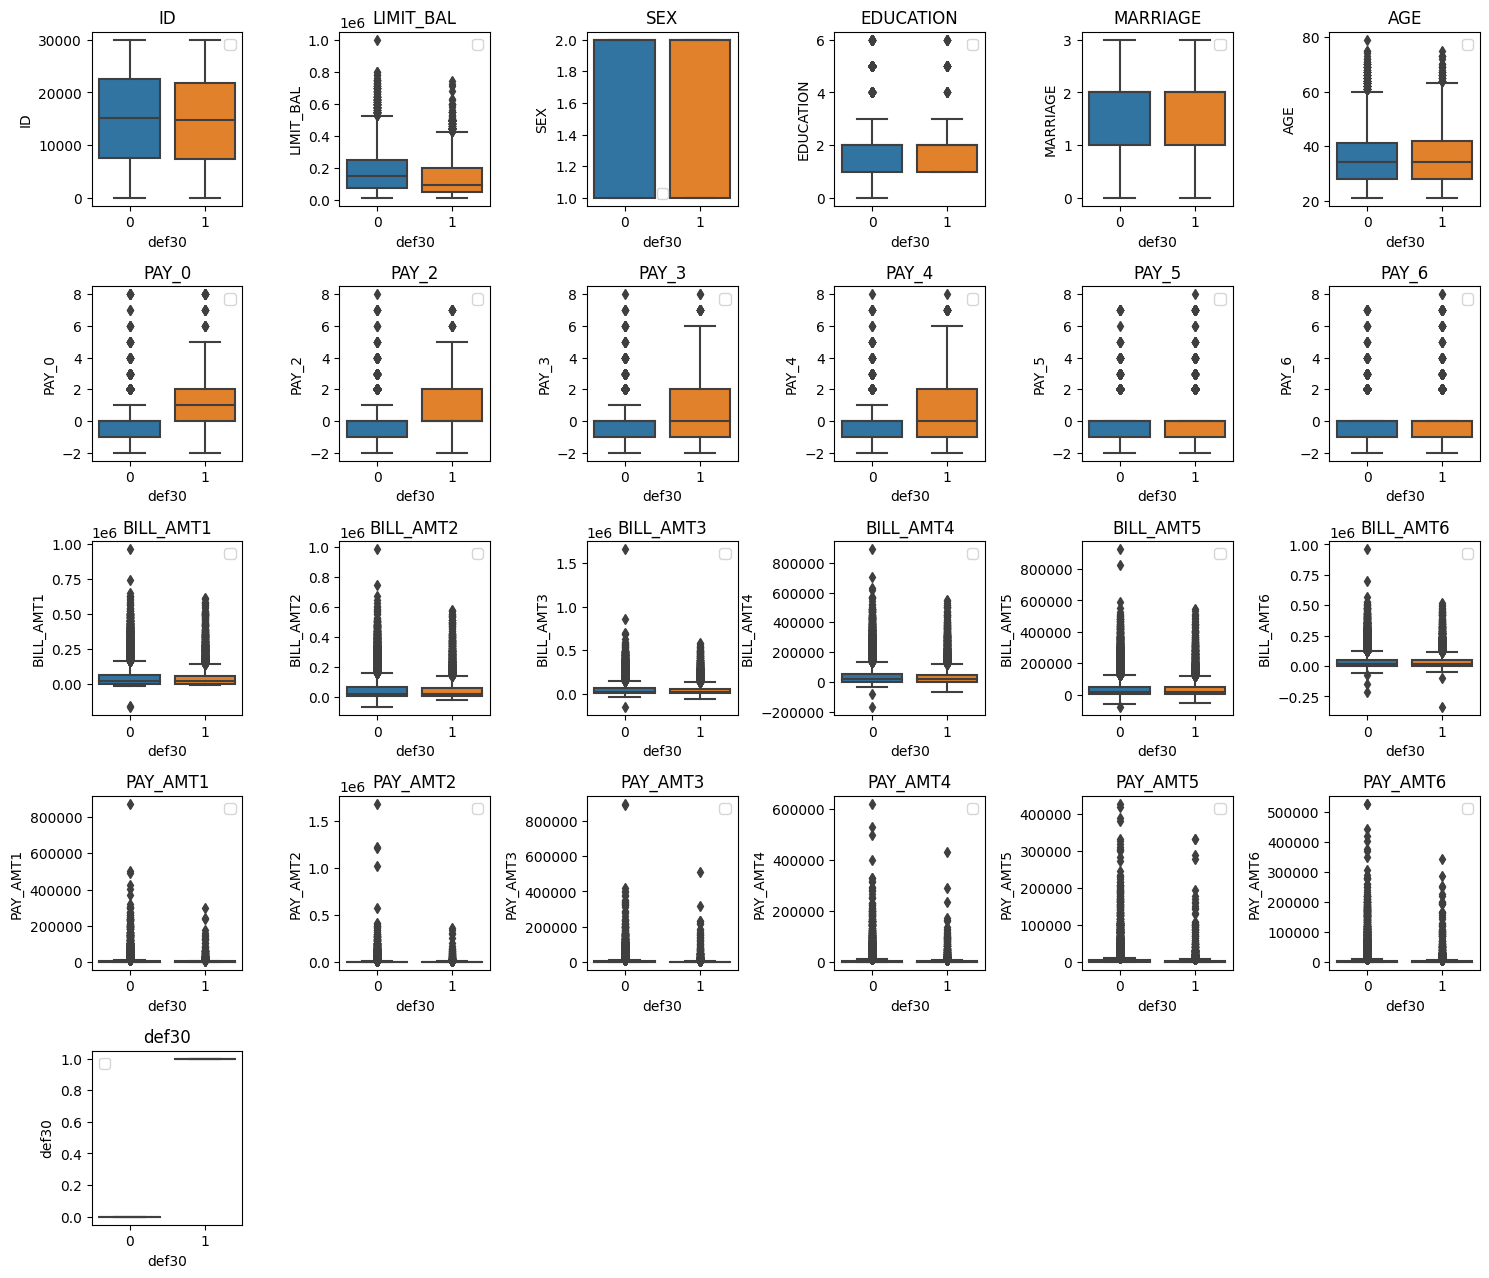

In [10]:
# также я хочу посмотреть на отношение между независимой переменной и зависимой

plt.figure(figsize=(15,15))
for num, col in enumerate(df_CC.columns):
    plt.subplot(6,6, num+1)
    plt.title(col)
    sns.boxplot(x="def30", y=col, data=df_CC)
    plt.legend()

plt.tight_layout()



Как можно видеть из коробчатых диаграмм, не получается назвать сильным предиктором такие переменные, как пол,образование и возраст. При этом данные, относящиеся к динамике задолженности и платежей дают чуть более понятную картину.

In [11]:
categories_watch = ['SEX', 'EDUCATION', 'MARRIAGE']
for category in categories_watch:
    print(df_CC[category].value_counts())

SEX
2    18112
1    11888
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


Из данных выше можно наблюдать: \
Женщин больше, чем мужчин \
Наибольшее число заемщиков с университетским или высшим образованием \
Наибольшее число заемщиков - холосты, хотя и женатых тоже много. Заемщиков в других категориях совсем мало

# Создание фичей и обработка данных
Создание фичей может быть очень эффективным для бустинговых моделей, поскольку добавляются новые данные об объекте исследования, с которыми модель не была знакома. \
Можно создать новый показатель - отношение размера выписка помесячно к размеру предоставленного лимита\
Также можно создать показатели среднего размера платежа и среднего размера выписки (после разделения датасета на тренировочный и тестовый)


In [12]:
for idx in range(1,7):
    df_CC[f'bill_limit{idx}'] = df_CC[f'BILL_AMT{idx}'] / df_CC[f'LIMIT_BAL']

Проблемы с данными: есть неизвестная категория 0 в замужестве, категории 5 и 6 для образования неизвестны, категория 0 не содержит описание.sns.countplot('IsDefaulter', data = balance_df)

In [13]:
df_CC.loc[(df_CC.EDUCATION == 5) | (df_CC.EDUCATION == 6) | (df_CC.EDUCATION == 0), 'EDUCATION'] = 4
print(df_CC.EDUCATION.unique())
df_CC.loc[df_CC.MARRIAGE == 0, 'MARRIAGE'] = 3
print(df_CC.MARRIAGE.unique())

[2 1 3 4]
[1 2 3]


In [16]:
# по неизвестной причине эта колонка начинает с 0 инедкса, а не с 1, как в других колонках
df_CC.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df_CC.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def30',
       'bill_limit1', 'bill_limit2', 'bill_limit3', 'bill_limit4',
       'bill_limit5', 'bill_limit6'],
      dtype='object')

In [17]:
# теперь стоит разобраться со значениями в колонках PAY_n, где n - номер колонки. 
# проблема в значениях -2 и 0, которые вообще не упоминаются в описании в документации. -1 относится к своевременному платежу. 
# За неимением описания, будем считать значения -2,-1, 0 равными 0 

for idx in range(1, 7):
    current_var = f'PAY_{idx}'
    df_CC.loc[(df_CC[current_var] == -1) | (df_CC[current_var] == -2) | (df_CC[current_var] == 0), current_var] = 0
    

In [18]:
df_CC.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def30',
       'bill_limit1', 'bill_limit2', 'bill_limit3', 'bill_limit4',
       'bill_limit5', 'bill_limit6'],
      dtype='object')

In [19]:
# пришло время создавать агрегированные переменные
# можно начать с общего количества платежей
df_CC['PAY_SUM'] = df_CC[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].sum(axis=1)
df_CC['PAY_SUM'].head()

0    4
1    4
2    0
3    0
4    0
Name: PAY_SUM, dtype: int64

In [20]:
bill_amt_var_list = [f"BILL_AMT{i}" for i in range(1,7)]
pay_amt_var_list = [f"PAY_AMT{i}" for i in range(1,7)]
print(bill_amt_var_list)
print(pay_amt_var_list)

# также создадим переменную, характеризующую общую задолженность
df_CC['total_due'] = df_CC[bill_amt_var_list].sum(axis=1) - df_CC[pay_amt_var_list].sum(axis=1)
df_CC['total_due'].head()

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


0      7015.0
1     12077.0
2     90635.0
3    222946.0
4     50290.0
Name: total_due, dtype: float64

In [21]:
# теперь можно посмотреть на задолженность с разбивкой по целевому событию
df_CC.groupby('def30')['total_due'].agg(np.mean)

def30
0    237459.487203
1    240853.661844
Name: total_due, dtype: float64

Различия между средними задолженностями в случае дефолта и при их отсутствии минимальны. Скорее всего, это не лучший предиктор ухода в дефолт.

In [22]:
# использую one hot encoding для преобразования категориальных переменных 
df_CC = pd.get_dummies(df_CC,columns=['EDUCATION','MARRIAGE'])
df_CC.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,bill_limit6,PAY_SUM,total_due,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,2,24,2,2,0,0,0,0,...,0.000000,4,7015.0,False,True,False,False,True,False,False
1,2,120000.0,2,26,0,2,0,0,0,2,...,0.027175,4,12077.0,False,True,False,False,False,True,False
2,3,90000.0,2,34,0,0,0,0,0,0,...,0.172767,0,90635.0,False,True,False,False,False,True,False
3,4,50000.0,2,37,0,0,0,0,0,0,...,0.590940,0,222946.0,False,True,False,False,True,False,False
4,5,50000.0,1,57,0,0,0,0,0,0,...,0.382620,0,50290.0,False,True,False,False,True,False,False


In [23]:
# Когда имеются флаги one hot encoding для всех категорий, одна из них может быть убрана, так как она будет автоматически учитана
df_CC.drop(['EDUCATION_4','MARRIAGE_3'],axis = 1, inplace = True)

In [24]:
# колонка индекса не несет полезной информации 
df_CC.drop('ID', axis = 1, inplace = True)

In [25]:
# можно перекодировать пол в 0 и 1
df_CC = df_CC.replace({"SEX" : {1 : 0, 2 : 1}})

In [26]:
# также можно создать переменную близости суммарных платежей к погашению лимита
# позже данная переменная будет нормализована от 0 до 1
df_CC['closeness'] = (df_CC['LIMIT_BAL'] - df_CC[bill_amt_var_list].sum(axis=1)) / df_CC['LIMIT_BAL']
df_CC['closeness'].head()

0    0.614800
1    0.857692
2   -0.129478
3   -3.626680
4   -1.186780
Name: closeness, dtype: float64

In [27]:
# перевожу описание столбцов стандратным методом pandas в DataFrame
# после чего оставляю для нормализации только колонки со стандратным отклонением выше 1
df_describe = pd.DataFrame(df_CC.describe().T)
columns_to_normilize = list(df_describe.loc[df_describe['std']>1].index)
print(columns_to_normilize)

# нормализация значений
scaler=StandardScaler()

df_CC[columns_to_normilize]=scaler.fit_transform(df_CC[columns_to_normilize])
df_CC.head()

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_SUM', 'total_due', 'closeness']


,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,bill_limit5,bill_limit6,PAY_SUM,total_due,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2,closeness
0,-1.136720,1,-1.246020,2,2,0,0,0,0,-0.642501,...,0.000000,0.000000,0.640657,-0.636623,False,True,False,True,False,0.877698
1,-0.365981,1,-1.029047,0,2,0,0,0,2,-0.659219,...,0.028792,0.027175,0.640657,-0.622684,False,True,False,False,True,0.992741
2,-0.597202,1,-0.161156,0,0,0,0,0,0,-0.298560,...,0.166089,0.172767,-0.467603,-0.406365,False,True,False,False,True,0.525178
3,-0.905498,1,0.164303,0,0,0,0,0,0,-0.057491,...,0.579180,0.590940,-0.467603,-0.042032,False,True,False,True,False,-1.131240
4,-0.905498,0,2.334029,0,0,0,0,0,0,-0.578618,...,0.382920,0.382620,-0.467603,-0.517460,False,True,False,True,False,0.024396


In [28]:
# важно посмотреть вступившие изменения по колонкам
df_CC.describe().T


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,-6.063298e-17,1.000017,-1.213794,-0.905498,-0.211833,0.558907,6.416528
SEX,30000.0,6.037333e-01,0.489129,0.000000,0.000000,1.000000,1.000000,1.000000
AGE,30000.0,-1.856885e-16,1.000017,-1.571479,-0.812074,-0.161156,0.598248,4.720729
PAY_1,30000.0,3.567667e-01,0.760594,0.000000,0.000000,0.000000,0.000000,8.000000
PAY_2,30000.0,3.200333e-01,0.801727,0.000000,0.000000,0.000000,0.000000,8.000000
PAY_3,30000.0,3.040667e-01,0.790589,0.000000,0.000000,0.000000,0.000000,8.000000
PAY_4,30000.0,2.587667e-01,0.761113,0.000000,0.000000,0.000000,0.000000,8.000000
PAY_5,30000.0,2.215000e-01,0.717720,0.000000,0.000000,0.000000,0.000000,8.000000
PAY_6,30000.0,2.265667e-01,0.715438,0.000000,0.000000,0.000000,0.000000,8.000000
BILL_AMT1,30000.0,-1.231607e-17,1.000017,-2.944312,-0.647312,-0.391688,0.215492,12.402963


В данном датасете этап поиска влиятельных значений и аномальных значений можно проспустить, так как имеющиеся показатели корректно отображают существующий портфель банка по кредитным картам и займам. То есть, если обратился человек, которому действительно предоставили высокий кредитный лимит и он действительно ушел в большую просрочку или действительно совершил аномально высокое количество платежей, это нужно учесть.

# Тренировка моделей
Для тренировки будем использовать и искать гиперпараметры для градиентного бустинга и логистической регрессии

In [29]:
# для адресации проблемы дисбаланса классов использую оверсемплирование минорного класса техникой SMOTE с заполнением синтетическими данными
# также важно разделить набор данных на тренировочный и тестовый
X_train, X_test, y_train, y_test = train_test_split(df_CC.drop('def30', axis=1), df_CC['def30'], test_size=0.2)

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)
print(x_smote.shape, y_smote.shape)

(37476, 35) (37476,)


In [ ]:
# В датасете много фичей, 37 
# Попробуем выбрать 15 самых полезных, используя рекурсивное удаление переменных при помощи классификатора случайного леса
clf = RandomForestClassifier()
logreg = LogisticRegression()
rfe = RFE(estimator=clf, n_features_to_select=15)
X_train_rfe = rfe.fit_transform(x_smote, y_smote)
selected_features = x_smote.loc[:, rfe.support_].columns
print(selected_features)

In [ ]:
# Обновляю переменные в соответствии с выбранными фичами
X_test = X_test[selected_features]

x_train_logreg = x_smote[selected_features]
x_train_logreg.head()


In [ ]:
# Теперь попробую найти наилучшие гиперпараметры для логистической регрессии
params_logreg = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100] }
gridsearch_logreg = GridSearchCV(logreg, params_logreg, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 5)
gridsearch_logreg.fit(x_train_logreg, y_smote)


In [ ]:
# Собираю результаты обучения
print(gridsearch_logreg.best_estimator_)
print(gridsearch_logreg.best_params_) 
best_logreg = gridsearch_logreg.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)
print(y_pred_logreg.shape, X_test.shape)

test_accuracy_logreg = accuracy_score(y_pred_logreg,y_test)
test_precision_score_logreg = precision_score(y_pred_logreg,y_test)
test_recall_score_logreg = recall_score(y_pred_logreg,y_test)
test_f1_score_logreg = f1_score(y_pred_logreg,y_test)
test_roc_score_logreg = roc_auc_score(y_pred_logreg,y_test)

print("Accuracy ", test_accuracy_logreg)
print("Precision ", test_precision_score_logreg)
print("Recall ", test_recall_score_logreg)
print("f1 ", test_f1_score_logreg)
print("roc_auc ", test_roc_score_logreg)

In [ ]:
# построение Градиентиного бустинга. Подбор параметров
params_xgboost = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

# Для градиентного бустинга предоставлю все колонки, так как алгоритм лучше защищен от переобучения.
gridsearch_xgboost = GridSearchCV(estimator = xgb(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4), 
 param_grid = params_xgboost, scoring='accuracy',n_jobs=-1, cv=5, verbose = 2)
gridsearch_xgboost.fit(x_smote, y_smote)

In [ ]:
# Сбор предсказаний
print(gridsearch_xgboost.best_score_)
best_xgb = gridsearch_xgboost.best_estimator_
# переобозначение X_test
X_train, X_test, y_train, y_test = train_test_split(df_CC.drop('def30', axis=1), df_CC['def30'], test_size=0.2)
y_pred_xgb = best_xgb.predict(X_test)

In [ ]:
# Сбор показателей качества модели
test_accuracy_xgb = accuracy_score(y_pred_xgb,y_test)
test_precision_score_xgb = precision_score(y_pred_xgb,y_test)
test_recall_score_xgb = recall_score(y_pred_xgb,y_test)
test_f1_score_xgb = f1_score(y_pred_xgb,y_test)
test_roc_score_xgb = roc_auc_score(y_pred_xgb,y_test)

print("Accuracy ", test_accuracy_xgb)
print("Precision ", test_precision_score_xgb)
print("Recall ", test_recall_score_xgb)
print("f1 ", test_f1_score_xgb)
print("roc_auc ", test_roc_score_xgb)